In [1]:
#class imbalance >> when one class has higher percentage
#handle:
#upsampling
#downsampling 
#SMOTE

In [2]:
import pandas as pd
import numpy as np

np.random.seed(1) #for reproducibility of result

no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples*class_0_ratio)
no_class_1 = 100

In [3]:
no_class_0, no_class_1

(900, 100)

In [4]:
class_0 = {'feature1': np.random.normal(0, 1, no_class_0),
          'feature2': np.random.normal(0, 1, no_class_0),
          'target': [0]*no_class_0}

In [1]:
class_0 = pd.DataFrame(class_0)

NameError: name 'pd' is not defined

In [7]:
class_0

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [9]:
class_1 = pd.DataFrame({'feature1': np.random.normal(3, 1, no_class_1),
          'feature2': np.random.normal(3, 1, no_class_1),
          'target': [1]*no_class_1})

In [10]:
class_1

,feature1,feature2,target
0,3.489517,3.482598,1
1,3.238796,1.894568,1
2,2.551888,3.420755,1
3,2.389205,4.616794,1
4,0.970055,2.116229,1
...,...,...,...
95,3.268527,2.291345,1
96,2.844950,2.127498,1
97,5.112622,1.906210,1
98,3.256079,1.465300,1


In [13]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [14]:
df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
995,3.268527,2.291345,1
996,2.844950,2.127498,1
997,5.112622,1.906210,1
998,3.256079,1.465300,1


In [15]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [17]:
#upsampling
df_minority = df[df.target == 1]
df_majority = df[df.target == 0]

In [18]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [19]:
df_minority

,feature1,feature2,target
900,3.489517,3.482598,1
901,3.238796,1.894568,1
902,2.551888,3.420755,1
903,2.389205,4.616794,1
904,0.970055,2.116229,1
...,...,...,...
995,3.268527,2.291345,1
996,2.844950,2.127498,1
997,5.112622,1.906210,1
998,3.256079,1.465300,1


In [21]:
#replace >> if replace is true, it means data point can be repeated
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace = True, n_samples= len(df_majority), random_state = 1)

In [23]:
df_minority_upsampled.shape

(900, 3)

In [25]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [26]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [27]:
#downsampling
df_minority

,feature1,feature2,target
900,3.489517,3.482598,1
901,3.238796,1.894568,1
902,2.551888,3.420755,1
903,2.389205,4.616794,1
904,0.970055,2.116229,1
...,...,...,...
995,3.268527,2.291345,1
996,2.844950,2.127498,1
997,5.112622,1.906210,1
998,3.256079,1.465300,1


In [28]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [29]:
df_majority_downsampled = resample(df_majority, replace = False, n_samples = len(df_minority), random_state=1)

In [30]:
df_majority_downsampled

,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [32]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [33]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [34]:
#SMOTE>> SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE

In [35]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_redundant=0, n_features = 2, n_clusters_per_class=1, weights = [0.90])

In [36]:
X

array([[ 1.8381636 , -0.78464001],
       [ 0.60330667,  0.80340388],
       [ 2.13307173, -0.39859855],
       ...,
       [ 1.47665032,  0.02239807],
       [ 1.07035654,  2.63982931],
       [ 1.28678957,  1.82948039]])

In [37]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [40]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
final_df = pd.concat([df1, df2], axis = 1)

In [41]:
final_df

,f1,f2,target
0,1.838164,-0.784640,0
1,0.603307,0.803404,0
2,2.133072,-0.398599,0
3,0.945983,0.584359,0
4,0.348778,0.500526,0
...,...,...,...
995,-1.149158,-0.545087,1
996,0.832398,0.292129,0
997,1.476650,0.022398,0
998,1.070357,2.639829,0


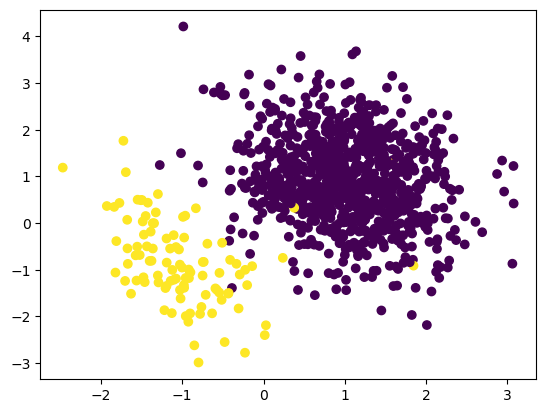

In [42]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

In [44]:
#!pip  install imblearn
from imblearn.over_sampling import SMOTE
oversample  = SMOTE()

In [45]:
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [46]:
X.shape

(1798, 2)

In [48]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
smote_df = pd.concat([df1, df2], axis = 1)

In [49]:
smote_df

,f1,f2,target
0,1.838164,-0.784640,0
1,0.603307,0.803404,0
2,2.133072,-0.398599,0
3,0.945983,0.584359,0
4,0.348778,0.500526,0
...,...,...,...
1793,-1.524107,0.126196,1
1794,-1.713618,1.546076,1
1795,-1.018563,-1.607783,1
1796,-1.551824,0.116264,1


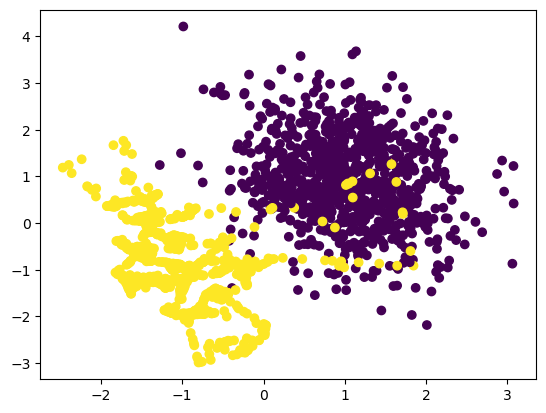

In [50]:
plt.scatter(smote_df['f1'], smote_df['f2'], c = smote_df['target'])